In [2]:
from math import *
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
u0 = lambda x: sin(x) - 0.125*(x**2)
ul = lambda t: sin(1+4*t) - 0.125
dul = lambda t: 4*cos(1+4*t)
d2ul = lambda t: -16*sin(1+4*t)
d3ul = lambda t: -64*cos(1+4*t)
a = lambda x: -4
dadx = lambda x: 0
dadt = 0
b = lambda x: x
dbdx = lambda x: 1
dbdt = 0

u_an = lambda x, t: sin(x+4*t)-0.125*(x**2)

Считаем для значений h=0.5, L=80, соответственно N=L/h+1=161

In [6]:
t0, t1 = 0, 1
x0, x1 = 0, 1

tau_h = 0.5
L = 80
N = round(L/tau_h)

tt = np.linspace(t0, t1, N+1)
tau = np.diff(tt)[0]

xx = np.linspace(x0, x1, L+1)
h = np.diff(xx)[0]

u_curr = np.zeros([L+1])
u_prev = [u0(x) for x in xx]

for n in range(N):
    u_prev = u_curr
    u_curr = np.zeros([L+1])
    for l in range(L+1):
        if l<L+1-3:
            a1 = (2*tau/(3*h))*(2*u_prev[l+3]-9*u_prev[l+2]+18*u_prev[l+1]-11*u_prev[l])
            a2 = (8*(tau**2)/(h**2))*(-u_prev[l+3]+4*u_prev[l+2]-5*u_prev[l+1]+2*u_prev[l])
            a3 = (32*(tau**3)/(3*(h**3))) * (u_prev[l+3]-3*u_prev[l+2]+3*u_prev[l+1]-u_prev[l])
            a4 = (tau*xx[l]) + 2*(tau**2)
            u_curr[l] = u_prev[l] + a1 + a2 + a3 + a4
        elif l == L:
            u_curr[l] = ul(tt[n+1])
        else:
            t = tt[n+1]
            du = cos(1+4*t)-0.125*2*1
            d2u = -sin(1+4*t)-0.125*2

            dx = (l - L)*h
            u_curr[l] = ul(t) + (du*dx) + (d2u*(dx**2)/2)

    if max(u_curr)>1e3:
        break

n = L//10
u_ann = [u_an(x, tt[-1]) for x in xx[::n]]
diff = abs(u_curr[::n] - u_ann)

df = pd.DataFrame({'x': xx[::n], 'u': u_curr[::n], 'u*': u_ann, 'd': diff})
df

,x,u,u*,d
0,0.0,-0.756801,-0.756802,1.664927e-06
1,0.1,-0.819526,-0.819527,1.456705e-06
2,0.2,-0.876575,-0.876576,1.233927e-06
3,0.3,-0.927415,-0.927416,9.988206e-07
4,0.4,-0.971601,-0.971602,7.537342e-07
5,0.5,-1.008780,-1.008780,5.011168e-07
6,0.6,-1.038691,-1.038691,2.434924e-07
7,0.7,-1.061173,-1.061173,1.656489e-08
8,0.8,-1.076165,-1.076165,2.764567e-07
9,0.9,-1.083703,-1.083703,5.335862e-07


проверка на устойчивость

In [4]:
def run(L, tau_h):
    t0, t1 = 0, 1
    x0, x1 = 0, 1

    N = round(L/tau_h)

    tt = np.linspace(t0, t1, N+1)
    tau = np.diff(tt)[0]

    xx = np.linspace(x0, x1, L+1)
    h = np.diff(xx)[0]

    u_curr = np.zeros([L+1])
    u_prev = [u0(x) for x in xx]

    for n in range(N):
        u_prev, u_curr = u_curr, u_prev
#         u_prev = u_curr
        # u_curr = np.zeros([L+1])
        for l in range(L+1):
            if l>=3:
                a1 = (tau/(6*h))*(xx[l]+4)*(1-(tau/2)+((tau**2)/6))*(2*u_prev[l-3]-9*u_prev[l-2]+18*u_prev[l-1]-11*u_prev[l])
                a2 = ((tau**2)/(2*(h**2)))*((xx[l]+4)**2) * (1-tau)*(-u_prev[l-3]+4*u_prev[l-2]-5*u_prev[l-1]+2*u_prev[l])
                a3 = -((tau**3)/(6*(h**3)))*((xx[l]+4)**3) * (-u_prev[l-3]+3*u_prev[l-2]-3*u_prev[l-1]+u_prev[l])
                u_curr[l] = u_prev[l] + a1 + a2 + a3
            elif l == 0:
                u_curr[l] = ul(tt[n+1])
            else:
                t = tt[n+1]
                du = 8*exp(-2*t)
                d2u = 2*exp(-2*t)

                dx = l*h
                u_curr[l] = ul(t) + (du*dx) + (d2u*(dx**2)/2)

        if max(u_curr)>1e3:
            break

    n = L//10
    u_ann = np.array([u_an(x, tt[-1]) for x in xx])
    diff = abs(u_curr - u_ann)

    return max(diff)

In [5]:
L = 80
tau_hs = np.linspace(0.01, 1, 100)

stab = [run(L, tau_h) for tau_h in tau_hs]

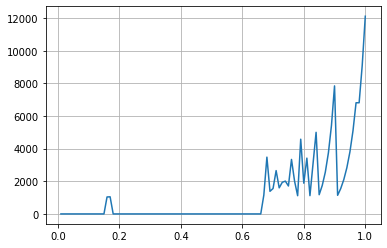

In [6]:
plt.plot(tau_hs, stab)
plt.grid()

In [7]:
pd.DataFrame({'tau/h': tau_hs, 'stab': stab})[40:70].T

,40,41,42,43,44,45,46,47,48,49,...,60,61,62,63,64,65,66,67,68,69
tau/h,0.410000,0.420000,0.430000,0.440000,0.450000,0.460000,0.470000,0.480000,0.490000,0.500000,...,0.610000,0.620000,0.630000,0.640000,0.650000,0.660000,0.670000,0.680000,0.690000,0.700000
stab,0.327122,0.327122,0.327122,0.327122,0.327122,0.327122,0.327122,0.327122,0.327122,0.327122,...,0.327122,0.327122,0.327122,0.327122,0.327122,0.327122,1153.255165,3479.203756,1385.763681,1557.376734


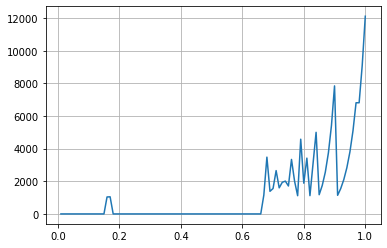

In [8]:
plt.plot(tau_hs, stab)
plt.grid()

In [9]:
# run(40)/run(80)

In [10]:
# run(80)/run(160)

In [11]:
# run(160)/run(320)